In [97]:
# Imports
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
from datascience import *
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [98]:
# Read in 'Housing.csv'
housing = pd.read_csv('Housing.csv')
housing_columns = housing.columns
housing_arr = housing.values
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [99]:
conditions = [housing_arr == "no", housing_arr == "yes", housing_arr == 'furnished', housing_arr == 'semi-furnished', housing_arr == 'unfurnished']
values = [0, 1, 2, 1, 0]

housing_arr = np.select(conditions, values, housing_arr)

pd.DataFrame(housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [100]:
# Takes in an np_array and removes features for a percentage of rows and sets missing values to np.nan
def remove_random_features(arr, percent=.10):
    num_rows_to_modify = int(percent * arr.shape[0])
    rand_rows = np.random.choice(np.arange(arr.shape[0]), num_rows_to_modify, replace=False)
    new_arr = arr.copy()
    for i in rand_rows:
        rand_index = np.random.randint(0, arr.shape[1])
        new_arr[i, rand_index] = np.nan
    
    return new_arr

In [101]:
housing_with_missing_features = remove_random_features(housing_arr)
pd.DataFrame(housing_with_missing_features, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,NaN,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,NaN,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [102]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(housing_with_missing_features)
mean_imputed_housing_arr = imp_mean.transform(housing_with_missing_features)
pd.DataFrame(mean_imputed_housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.330000e+07,7420.0,4.0,2.0,3.0,1.0,0.0,0.0,0.000000,1.0,2.0,1.0,2.0
1,1.225000e+07,8960.0,4.0,4.0,4.0,1.0,0.0,0.0,0.000000,1.0,3.0,0.0,2.0
2,1.225000e+07,9960.0,3.0,2.0,2.0,1.0,0.0,1.0,0.000000,0.0,2.0,1.0,1.0
3,1.221500e+07,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,0.000000,1.0,3.0,1.0,2.0
4,4.749962e+06,7420.0,4.0,1.0,2.0,1.0,1.0,1.0,0.000000,1.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.820000e+06,3000.0,2.0,1.0,1.0,1.0,0.0,1.0,0.046468,0.0,2.0,0.0,0.0
541,1.767150e+06,2400.0,3.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
542,1.750000e+06,3620.0,2.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
543,1.750000e+06,2910.0,3.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.0


In [103]:
mean_mse = (np.square(housing_arr - mean_imputed_housing_arr)).mean()
mean_mse

10703604682.043348

In [104]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(housing_with_missing_features)
median_imputed_housing_arr = imp_median.transform(housing_with_missing_features)
pd.DataFrame(median_imputed_housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0
1,12250000.0,8960.0,4.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0
2,12250000.0,9960.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
3,12215000.0,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0
4,4340000.0,7420.0,4.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
541,1767150.0,2400.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000.0,3620.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543,1750000.0,2910.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [105]:
median_mse = (np.square(housing_arr - median_imputed_housing_arr)).mean()
median_mse

11950924065.336908

In [106]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_most_frequent.fit(housing_with_missing_features)
most_frequent_imputed_housing_arr = imp_most_frequent.transform(housing_with_missing_features)
pd.DataFrame(most_frequent_imputed_housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,3500000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [107]:
most_frequent_mse = (np.square(housing_arr - most_frequent_imputed_housing_arr)).mean()
most_frequent_mse

15692215312.196472

In [108]:
k = 5
imp_knn = KNNImputer(missing_values=np.nan, n_neighbors=k)
knn_imputed_housing_arr = imp_knn.fit_transform(housing_with_missing_features)
pd.DataFrame(knn_imputed_housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0
1,12250000.0,8960.0,4.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0
2,12250000.0,9960.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
3,12215000.0,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0
4,6699000.0,7420.0,4.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
541,1767150.0,2400.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000.0,3620.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543,1750000.0,2910.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [109]:
knn_mse = (np.square(housing_arr - knn_imputed_housing_arr)).mean()
knn_mse

6544621055.7268591

In [110]:
[mean_mse, median_mse, most_frequent_mse, knn_mse]

[10703604682.043348,
 11950924065.336908,
 15692215312.196472,
 6544621055.7268591]

In [111]:
def simulate(imputer, data, trials, percent_missing=.10):
    res = np.zeros(trials)
    
    for i in range(trials):
        data_with_missing_features = remove_random_features(data, percent_missing)
        imputed_data = imputer.fit_transform(data_with_missing_features)
        
        res[i] = (np.square(data - imputed_data)).mean()
    return res

In [178]:
trials = 1000
results = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials),
              simulate(IterativeImputer(random_state=0), housing_arr, trials)
             ]).T
results.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']
results

,Median,Mean,Mode,KNN-3,Iterative
0,5.109992e+08,1.463619e+09,6.164707e+09,2.908203e+08,2.226691e+09
1,8.441419e+08,1.493185e+09,8.681389e+08,5.686270e+09,2.048158e+08
2,1.277390e+09,1.438884e+09,1.781049e+09,3.139710e+08,1.388086e+09
3,1.106584e+07,1.854973e+09,1.042625e+10,6.509075e+08,6.142649e+08
4,3.163411e+09,2.648883e+09,6.719788e+09,2.330257e+09,8.534458e+09
...,...,...,...,...,...
995,4.537713e+07,2.038631e+09,2.284018e+09,1.607422e+08,2.605251e+08
996,1.235375e+09,1.559015e+09,1.973491e+09,3.717545e+09,5.780349e+09
997,7.736782e+09,8.015562e+08,1.763932e+09,2.138905e+09,2.645691e+09
998,2.052441e+09,1.352909e+09,4.857676e+09,1.113234e+08,1.808199e+09


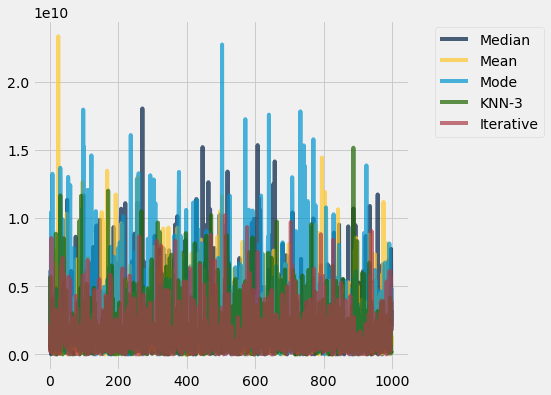

In [179]:
results_table = Table.from_df(results)
results_table.plot()

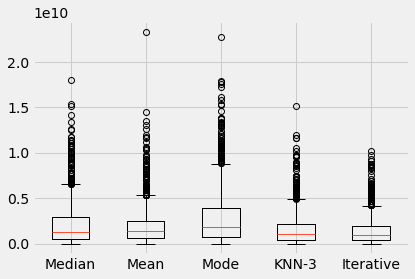

In [180]:
results_table.boxplot()

In [182]:
results_table.mean()

Median,Mean,Mode,KNN-3,Iterative
2.15942e+09,2.00988e+09,2.81663e+09,1.68341e+09,1.46749e+09


In [183]:
results_table_in_millions = Table.from_df(results_table.to_df() / 1e6)
results_table_in_millions

Median,Mean,Mode,KNN-3,Iterative
510.999,1463.62,6164.71,290.82,2226.69
844.142,1493.19,868.139,5686.27,204.816
1277.39,1438.88,1781.05,313.971,1388.09
11.0658,1854.97,10426.2,650.907,614.265
3163.41,2648.88,6719.79,2330.26,8534.46
4079.07,560.87,2119.94,850.487,4974.55
1256.75,266.99,285.116,178.728,703.988
1049.68,1003.38,13246.3,947.521,239.504
747.103,2528.53,3953.15,3148.19,6717.78
2410.41,194.319,1348.63,2517.03,2254.42


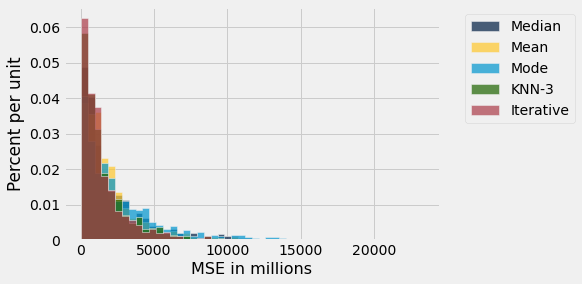

In [185]:
results_table_in_millions.hist(bins=50)
plt.xlabel('MSE in millions')
plt.show()

In [ ]:
# use cross validation to choose which k works best for k nearest neighbors 
choose_best_k = pd.DataFrame([
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=1), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=2), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=4), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=5), housing_arr, trials), 
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=6), housing_arr, trials), 
             ]).T
choose_best_k.columns = ['K=1', 'K=2', 'K=3', 'K=4', 'K=5', 'K=6']
choose_best_k

In [ ]:
k_table = Table.from_df(choose_best_k)
k_table.plot()

In [ ]:
choose_best_k.mean()